In [1]:
import numpy as np
import pandas as pd
from fastai.vision import *

In [2]:
path = Path('/notebooks'); print(path)
data_path = path
labels = pd.read_csv('/notebooks/train_labels.csv')
work_path = path/'models'

/notebooks


In [3]:
labels.rename(columns={'id': 'name'})
labels['id']='train/'+labels['id']+'.tif'

In [4]:
data = ImageDataBunch.from_df(data_path,
                              labels,
                              #test='test',
                              ds_tfms=get_transforms(do_flip=True,
                                                    flip_vert=True,
                                                    max_lighting=0.1,
                                                    max_warp=0.),
                              size=64).normalize(imagenet_stats)

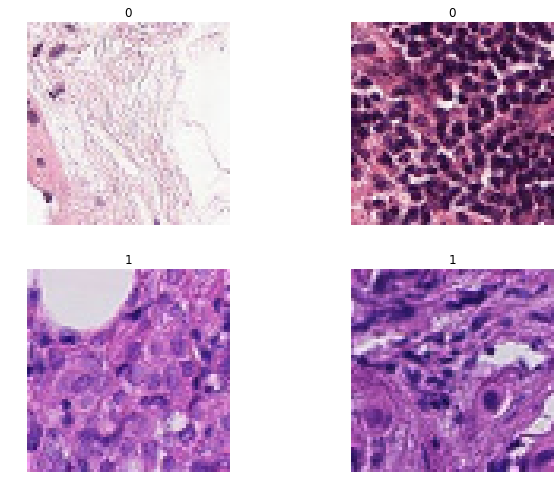

In [5]:
data.show_batch(2, figsize=(10,7))

In [6]:
def getLearner(arch, opt, loss):
    return cnn_learner(data,
                       arch,
                       opt_func = opt,
                       loss_func = loss,
                       metrics=[accuracy, AUROC()],
                       model_dir=work_path)

In [7]:
arch = models.densenet169
opt = optim.Adam
loss = nn.CrossEntropyLoss()

#learn = getLearner(arch, opt, loss)

#learn.fit_one_cycle(3, slice(1e-02), wd=0.01)

In [8]:
learn = getLearner(arch, opt, loss)

learn.fit_one_cycle(3, slice(1e-02), wd=0.01, pct_start=0.8)

epoch,train_loss,valid_loss,accuracy,auroc,time
0,0.305496,0.246100,0.904306,0.964122,07:23
1,0.208882,0.182374,0.931031,0.977625,07:24


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
learn = getLearner(arch, opt, loss)

learn.fit_one_cycle(3, slice(1e-02), wd=0.01, moms=(0.85, 0.75)) # Might be useful after some training

epoch,train_loss,valid_loss,accuracy,auroc,time
0,0.252203,0.222605,0.910624,0.974749,07:27
1,0.189724,0.169512,0.936030,0.981099,07:28
2,0.172408,0.143009,0.947415,0.986275,07:31


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

